Model and weights for 6 training samples exists. Loading model and weights.
Loaded model from disk
9999/9999 [==============================] - 6s 553us/step
acc: 29.06%
0.2906290629107614
Model and weights for 10 training samples exists. Loading model and weights.
Loaded model from disk
9999/9999 [==============================] - 5s 509us/step
acc: 25.91%
0.2591259125957299
Model and weights for 20 training samples exists. Loading model and weights.
Loaded model from disk
9999/9999 [==============================] - 5s 511us/step
acc: 35.94%
0.35943594359734
Model and weights for 30 training samples exists. Loading model and weights.
Loaded model from disk
9999/9999 [==============================] - 5s 543us/step
acc: 28.77%
0.28772877289815146
Model and weights for 40 training samples exists. Loading model and weights.
Loaded model from disk
9999/9999 [==============================] - 5s 539us/step
acc: 46.45%
0.4645464546812309
Model and weights for 50 training samples exists. Lo

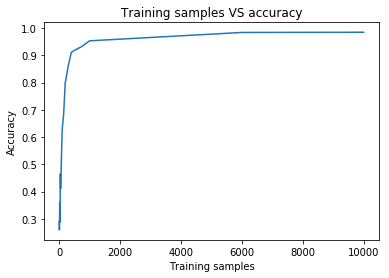

+------------------+---------------------+
| Training samples |       Accuracy      |
+------------------+---------------------+
|        6         |  0.2906290629107614 |
|        10        |  0.2591259125957299 |
|        20        |   0.35943594359734  |
|        30        | 0.28772877289815146 |
|        40        |  0.4645464546812309 |
|        50        | 0.41064106410939116 |
|       100        |  0.6250625062923525 |
|       150        |   0.68576857688153  |
|       200        |  0.7979797979976812 |
|       300        |  0.8611861186297444 |
|       400        |  0.9107910791079108 |
|       500        |  0.9180918091868792 |
|       750        |  0.9326932693388548 |
|       1000       |  0.9532953295389144 |
|       6000       |  0.983998399839984  |
|      10000       |  0.9847984798479849 |
+------------------+---------------------+


In [9]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from prettytable import PrettyTable
from keras import models    
from keras.models import model_from_json
from pathlib import Path
%matplotlib inline

def classifier(i, train_X, train_Y, test_X, test_Y, train_Y_one_hot, test_Y_one_hot, valid_X,train_label,valid_label):

    # Stage 3: Construct the neural network model + Stage 4: Overcome overfitting

    batch_size = 64
    epochs = 20
    num_classes = 10

    digit_model = Sequential()
    digit_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
    digit_model.add(LeakyReLU(alpha=0.1))
    digit_model.add(MaxPooling2D((2, 2),padding='same'))
    digit_model.add(Dropout(0.25))
    digit_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    digit_model.add(LeakyReLU(alpha=0.1))
    digit_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    digit_model.add(Dropout(0.25))
    digit_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    digit_model.add(LeakyReLU(alpha=0.1))                  
    digit_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    digit_model.add(Dropout(0.4))
    digit_model.add(Flatten())
    digit_model.add(Dense(128, activation='linear'))
    digit_model.add(LeakyReLU(alpha=0.1))           
    digit_model.add(Dropout(0.3))
    digit_model.add(Dense(num_classes, activation='softmax'))

    digit_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    # Stage 5: Train, evaluate, compare results

    digit_train_dropout = digit_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

    score = digit_model.evaluate(test_X, test_Y_one_hot, verbose=1)
    test_loss = score[0]
    test_acc = score[1]
    print("%s: %.2f%%" % (digit_model.metrics_names[1], score[1]*100))

    # serialize model to JSON  
    model_json = digit_model.to_json()
    with open('keras_mnist_exp1-1_model_%i_samples.json'  % i, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5    
    digit_model.save_weights('keras_mnist_exp1-1_weights_%i_samples.h5'  % i)   
    print("Saved model to disk") 
    return test_acc

def plot_graph(train_samples, accuracy):
    "This plots accuracy and training samples"
    plt.plot(train_samples, accuracy)
    plt.title('Training samples VS accuracy')
    plt.xlabel('Training samples')
    plt.ylabel('Accuracy')
    plt.savefig('exp1_1-cnn-mnist-6-10000-fig.png', dpi=300)
    plt.show()
    return

def draw_results_table_row(i, test_acc):
    "This draws a table row of accuracy and training samples"
    results_table.add_row([i, test_acc])
    return

def load_model_weights(i, train_X, train_Y, test_X, test_Y, train_Y_one_hot, test_Y_one_hot, valid_X,train_label,valid_label):
    batch_size = 64
    num_classes = 10
    epochs = 20


    #load json and create model
    json_file = open('keras_mnist_exp1-1_model_%i_samples.json'  % i, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    #load weights into new model
    loaded_model.load_weights('keras_mnist_exp1-1_weights_%i_samples.h5'  % i)
    print("Loaded model from disk")
    
    loaded_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    # Stage 5: Train, evaluate, compare results
    score = loaded_model.evaluate(test_X, test_Y_one_hot, verbose=1)
    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    test_loss = score[0]
    test_acc = score[1]
    
    return test_acc

# create new list of variables 
accuracy = []
train_samples = [6, 10, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 750, 1000, 6000, 10000]

# draw results table header
results_table = PrettyTable()
results_table.field_names = ["Training samples", "Accuracy"]
    
# loop through train_samples
for i in train_samples:
    #Stage 1 - Load
    #Read files
    df_orig_train = pd.read_csv('mnist_train_final.csv', skipfooter=(60000-i), engine='python')
    df_orig_test = pd.read_csv('mnist_test_final.csv')

    #training data
    #labels
    train_Y = df_orig_train['label'].values
    df_digits = df_orig_train.drop('label',axis=1)
    #images
    train_X = df_digits.values

    #test data
    #labels
    test_Y = df_orig_test['label'].values
    df_digits_test = df_orig_test.drop('label',axis=1)
    #images
    test_X = df_digits_test.values

    # Stage 2 - Preprocess
    train_X = train_X.reshape(-1, 28,28, 1)
    test_X = test_X.reshape(-1, 28,28, 1)
    train_X.shape, test_X.shape
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    train_X = train_X / 255.
    test_X = test_X / 255.

    # Change the labels from categorical to one-hot encoding
    train_Y_one_hot = to_categorical(train_Y)
    test_Y_one_hot = to_categorical(test_Y)

    train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
    
    # if model & weights for this value of i exist, load them. If not, classify (and save model + weights.)
    my_file = Path('keras_mnist_exp1-1_model_%i_samples.json'  % i)
    if my_file.is_file():
        print("Model and weights for %i training samples exists. Loading model and weights." % i)
        test_acc = load_model_weights(i, train_X, train_Y, test_X, test_Y, train_Y_one_hot, test_Y_one_hot, valid_X,train_label,valid_label)
    else:
        print("Model and weights for %i training samples does not exist. Beginning classification." % i)
        test_acc = classifier(i, train_X, train_Y, test_X, test_Y, train_Y_one_hot, test_Y_one_hot, valid_X,train_label,valid_label)
    
    print(test_acc)
    accuracy.append(test_acc)
    draw_results_table_row(i, test_acc)

plot_graph(train_samples, accuracy)
print(results_table)